# Coding Block 2 - Hyperparameter Optimization

### Load the packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
import time

### Read the dataset

In [3]:
data = pd.read_csv('../data/df_imputed_clean.csv')
data = data.drop(columns=['Mahalanobis_Distance', 'Multivariate_Outlier', 'Outlier', 'Unnamed: 0'])

### Copy the code from your last successful classifiers (RF, XGBoost, ...)
Or use function below for XGBoost/RF

In [4]:
def create_model(data, model_type="xgboost"):
    """
    Create and train ML models on the given dataset
    
    Parameters:
    -----------
    data : DataFrame
        The dataset containing features and target variable
    model_type : str
        The type of model to create (default: "xgboost")
        
    Returns:
    --------
    dict
        Dictionary containing the trained model, X and y data, and train/test splits
    """
    # Separate features and target
    X = data.drop('Outcome', axis=1)
    y = data['Outcome']
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create and train model based on type
    if model_type == "random_forest":
        from sklearn.ensemble import RandomForestClassifier
        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)
    elif model_type == "xgboost":
        import xgboost as xgb
        model = xgb.XGBClassifier(random_state=42)
        model.fit(X_train, y_train)
    else:
        raise ValueError(f"Unsupported model type: {model_type}")
    
    # Evaluate the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_type.title()} Model Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    
    # Return model and data
    return {
        "model": model,
        "X": X,
        "y": y,
        "X_train": X_train,
        "X_test": X_test,
        "y_train": y_train,
        "y_test": y_test
    }

### Define the parameter grid for GridSearchCV or use RandomizedSearchCV

/Users/chrisoesterreich/Developement/anaconda3/envs/donnerstag/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No path specified. Models will be saved in: "AutogluonModels/ag-20250320_105854"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.9.21
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.2.0: Fri Dec  6 19:01:59 PST 2024; root:xnu-11215.61.5~2/RELEASE_ARM64_T6000
CPU Count:          8
Memory Avail:       2.96 GB / 16.00 GB (18.5%)
Disk Space Avail:   14.72 GB / 460.43 GB (3.2%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://

Optimized AutoGluon Model Accuracy: 0.7877
              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85        97
         1.0       0.71      0.61      0.66        49

    accuracy                           0.79       146
   macro avg       0.77      0.74      0.75       146
weighted avg       0.78      0.79      0.78       146



<Figure size 600x400 with 0 Axes>

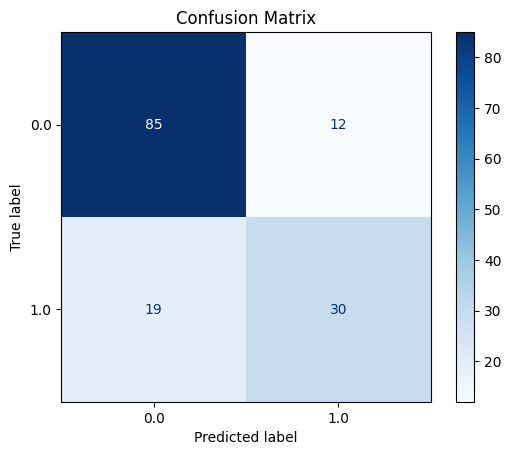

Computing feature importance via permutation shuffling for 8 features using 146 rows with 5 shuffle sets...
	3.5s	= Expected runtime (0.7s per shuffle set)
	0.4s	= Actual runtime (Completed 5 of 5 shuffle sets)
/var/folders/rx/tkw33hfs52z28pdphr1bqg100000gn/T/ipykernel_77264/3765498865.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance["importance"], y=feature_importance.index, palette="viridis")


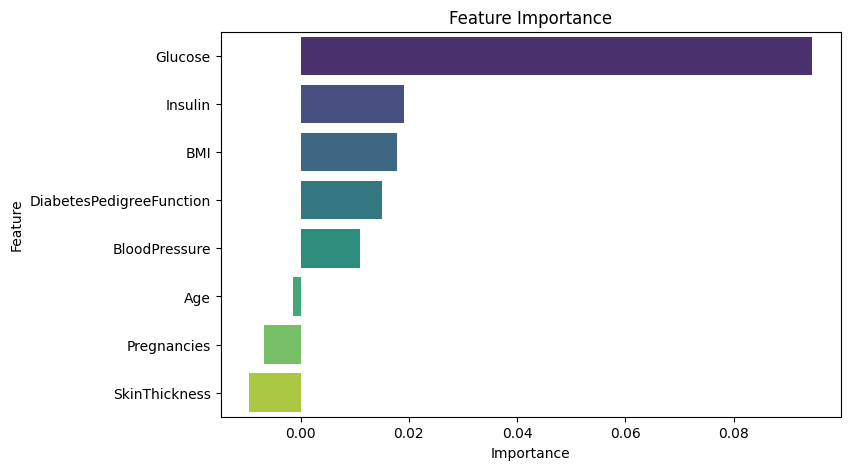

No path specified. Models will be saved in: "AutogluonModels/ag-20250320_110054"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.9.21
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.2.0: Fri Dec  6 19:01:59 PST 2024; root:xnu-11215.61.5~2/RELEASE_ARM64_T6000
CPU Count:          8
Memory Avail:       3.01 GB / 16.00 GB (18.8%)
Disk Space Avail:   14.66 GB / 460.43 GB (3.2%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. R

Optimized AutoGluon Model Accuracy: 0.7740
              precision    recall  f1-score   support

         0.0       0.77      0.95      0.85        97
         1.0       0.81      0.43      0.56        49

    accuracy                           0.77       146
   macro avg       0.79      0.69      0.70       146
weighted avg       0.78      0.77      0.75       146



<Figure size 600x400 with 0 Axes>

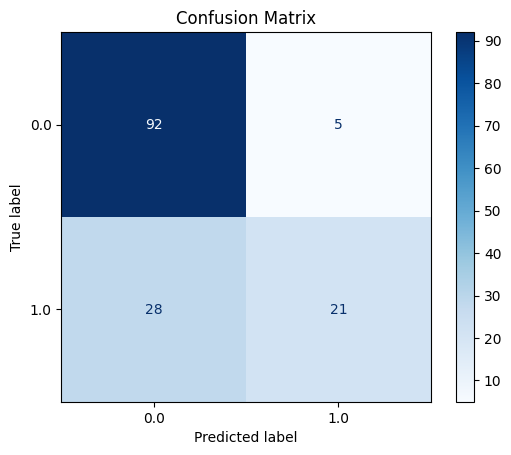

Computing feature importance via permutation shuffling for 8 features using 146 rows with 5 shuffle sets...
	2.23s	= Expected runtime (0.45s per shuffle set)
	0.3s	= Actual runtime (Completed 5 of 5 shuffle sets)
/var/folders/rx/tkw33hfs52z28pdphr1bqg100000gn/T/ipykernel_77264/3765498865.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance["importance"], y=feature_importance.index, palette="viridis")


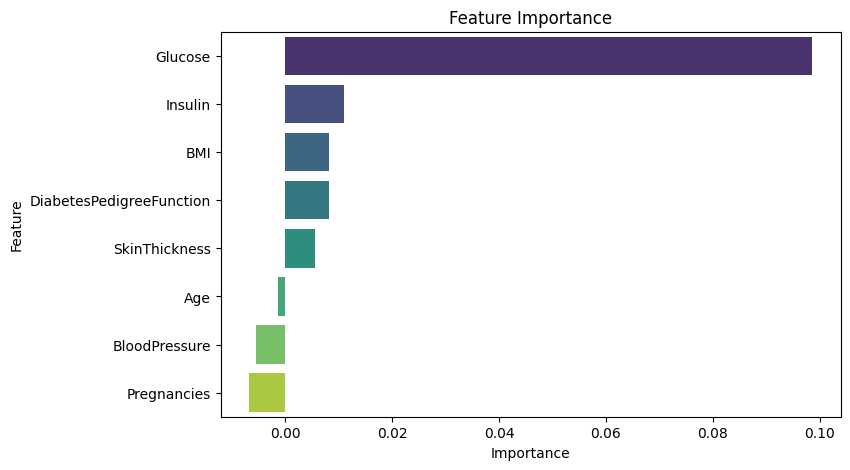

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from autogluon.tabular import TabularPredictor

# Load the dataset (Assuming 'data' is already defined)
# data = pd.read_csv("your_dataset.csv")

# Separate features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Train AutoGluon model
predictor = TabularPredictor(label='Outcome').fit(train_data)

# Make predictions
y_pred = predictor.predict(test_data.drop(columns=['Outcome']))

# Evaluate performance
accuracy = accuracy_score(test_data['Outcome'], y_pred)
print(f"Optimized AutoGluon Model Accuracy: {accuracy:.4f}")
print(classification_report(test_data['Outcome'], y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 4))
ConfusionMatrixDisplay.from_predictions(test_data['Outcome'], y_pred, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Plot feature importance
feature_importance = predictor.feature_importance(test_data)
feature_importance = feature_importance.sort_values(by="importance", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance["importance"], y=feature_importance.index, palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


### Perform GridSearchCV or RandomizedSearchCV and tune the hyperparameters of the model
Maybe the hyperparameter tuning won't finish in time though. No problem.

No path specified. Models will be saved in: "AutogluonModels/ag-20250320_110102"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.9.21
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.2.0: Fri Dec  6 19:01:59 PST 2024; root:xnu-11215.61.5~2/RELEASE_ARM64_T6000
CPU Count:          8
Memory Avail:       3.06 GB / 16.00 GB (19.1%)
Disk Space Avail:   14.64 GB / 460.43 GB (3.2%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. R

Optimized AutoGluon Model Accuracy: 0.7534
              precision    recall  f1-score   support

         0.0       0.74      0.97      0.84        97
         1.0       0.84      0.33      0.47        49

    accuracy                           0.75       146
   macro avg       0.79      0.65      0.65       146
weighted avg       0.77      0.75      0.72       146



<Figure size 600x400 with 0 Axes>

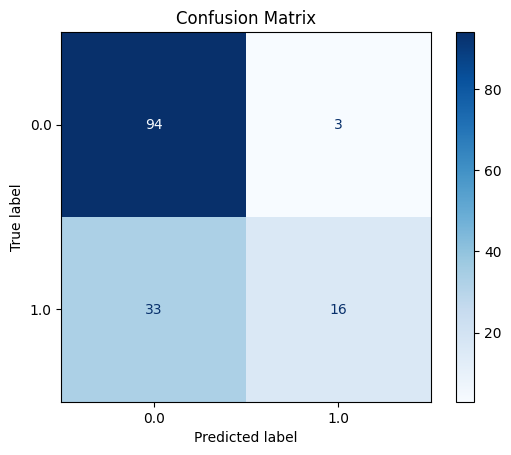

Computing feature importance via permutation shuffling for 8 features using 146 rows with 5 shuffle sets...
	0.14s	= Expected runtime (0.03s per shuffle set)
	0.04s	= Actual runtime (Completed 5 of 5 shuffle sets)
/var/folders/rx/tkw33hfs52z28pdphr1bqg100000gn/T/ipykernel_77264/113308294.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance["importance"], y=feature_importance.index, palette="viridis")


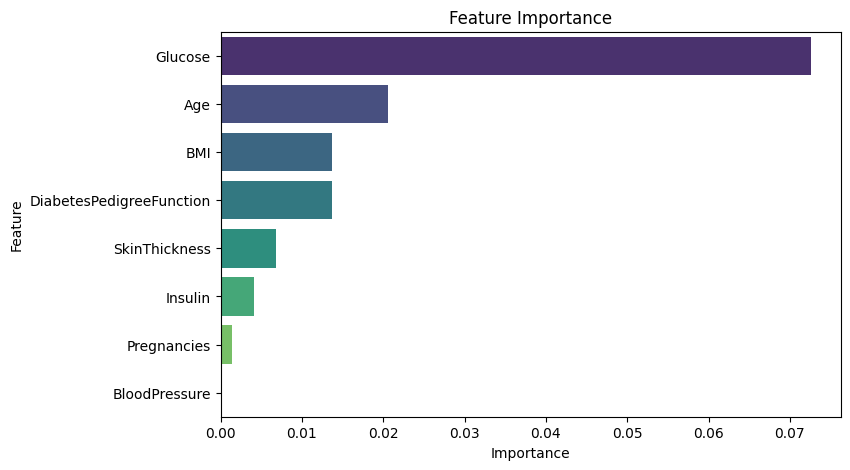

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from autogluon.tabular import TabularPredictor

# Load the dataset (Assuming 'data' is already defined)
# data = pd.read_csv("your_dataset.csv")

# Separate features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Define hyperparameter tuning options
time_limit = 600  # Set a time limit for tuning (e.g., 10 minutes)
predictor = TabularPredictor(label='Outcome').fit(train_data, time_limit=time_limit, hyperparameter_tune_kwargs='auto')

# Make predictions
y_pred = predictor.predict(test_data.drop(columns=['Outcome']))

# Evaluate performance
accuracy = accuracy_score(test_data['Outcome'], y_pred)
print(f"Optimized AutoGluon Model Accuracy: {accuracy:.4f}")
print(classification_report(test_data['Outcome'], y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 4))
ConfusionMatrixDisplay.from_predictions(test_data['Outcome'], y_pred, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Plot feature importance
feature_importance = predictor.feature_importance(test_data)
feature_importance = feature_importance.sort_values(by="importance", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance["importance"], y=feature_importance.index, palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
